In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import time
import pickle

In [2]:
# read info excel sheet
xls = pd.ExcelFile('data.xlsx')
df_info = pd.read_excel(xls,'Data')

In [4]:
# try to read imgs and save as objects

locations = {'DouglasReef', 'Iniskin', 'Kayak_Island', 'KukakBay', 'Uganik', 'Landlocked',
             'Stockdale', 'RockyBay'}

y = []
x = []


# þessi layer þarf að vera í modelinu fyrir prediction svo að við getum tekið við myndum af öllum gerðum
# getur orðið einhverskonar auto rescaling layer fyrir einhvern architecture, svosem googleNet eða eitthvað

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(500, 750),
  layers.experimental.preprocessing.Rescaling(1./255)
])

cwd = os.getcwd()
for subdir, dirs, files in os.walk(cwd+'\\Original'):
    if len(files) != 0:
        for l in locations:
            if l in subdir:
                location = l
                print(location)
                break

    for f in files:
        filepath = f'{subdir}/{f}'
        img = Image.open(filepath)
        img_dat = np.asarray(img)
        x.append(img_dat)
        y.append(location)


DouglasReef
DouglasReef
Iniskin
Iniskin
Kayak_Island
Kayak_Island
KukakBay
KukakBay
Uganik
Landlocked
Landlocked
Stockdale
RockyBay
RockyBay


In [5]:
# data split, y_test left out for model evaluation later on

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 14)

# free up memory
del x
del y

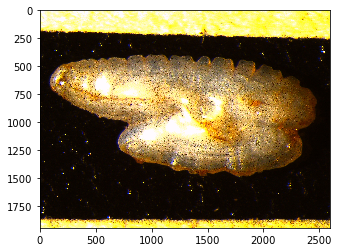

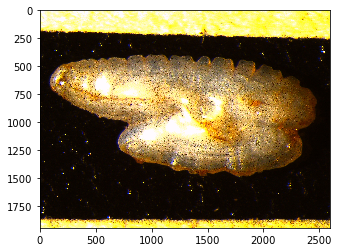

[254 252 255]
tf.Tensor([254 252 255], shape=(3,), dtype=uint8)
...



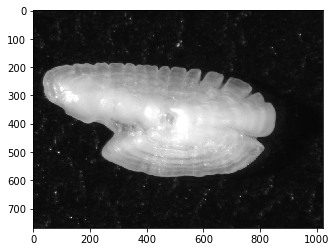

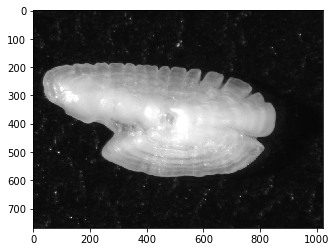

[14 14 14]
tf.Tensor([14 14 14], shape=(3,), dtype=uint8)
...



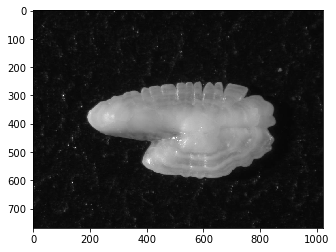

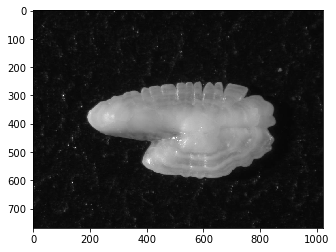

[25 25 25]
tf.Tensor([25 25 25], shape=(3,), dtype=uint8)
...



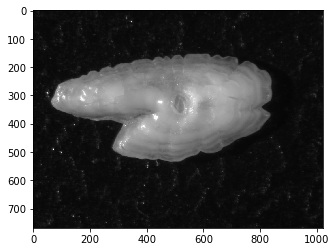

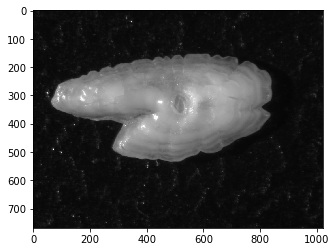

[11 11 11]
tf.Tensor([11 11 11], shape=(3,), dtype=uint8)
...



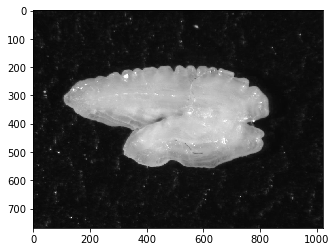

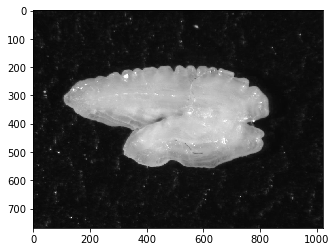

[14 14 14]
tf.Tensor([14 14 14], shape=(3,), dtype=uint8)
...



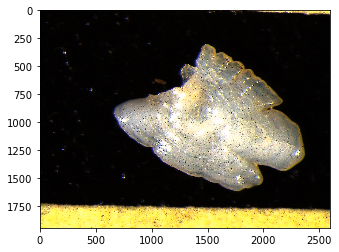

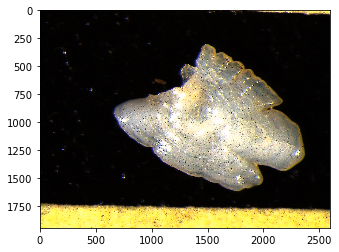

[5 4 2]
tf.Tensor([5 4 2], shape=(3,), dtype=uint8)
...



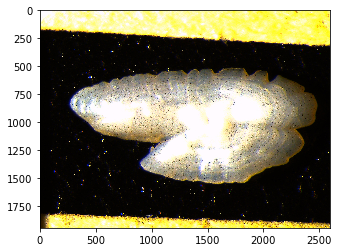

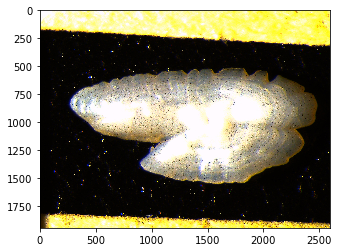

[255 251 255]
tf.Tensor([255 251 255], shape=(3,), dtype=uint8)
...



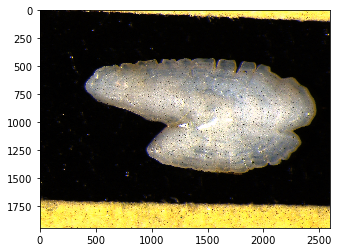

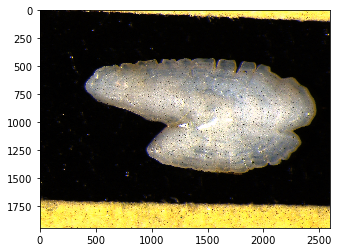

[6 5 3]
tf.Tensor([6 5 3], shape=(3,), dtype=uint8)
...



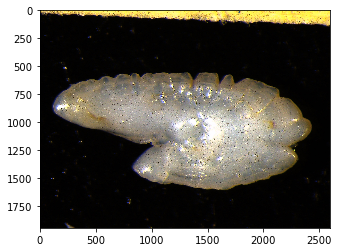

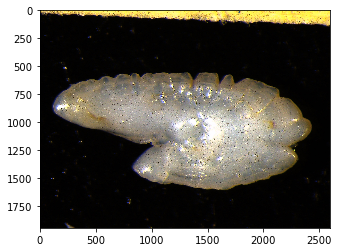

[211 197  64]
tf.Tensor([211 197  64], shape=(3,), dtype=uint8)
...



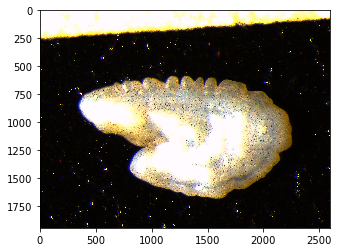

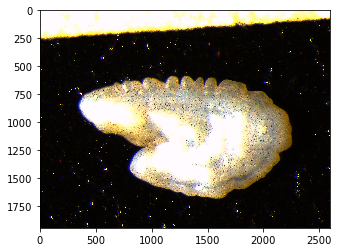

[255 251 255]
tf.Tensor([255 251 255], shape=(3,), dtype=uint8)
...



In [17]:
# don't have even close to enough data for large scale models
# therefore we apply data augmentation

data_augmentation = tf.keras.Sequential([
      layers.experimental.preprocessing.RandomRotation(0.05),
      layers.experimental.preprocessing.RandomZoom(0.3, 0.3),
      layers.experimental.preprocessing.RandomContrast(0.5)                                 
])

for i in range(10):
    aug_img = data_augmentation(tf.expand_dims(x_train[i],0))
    plt.imshow(x_train[i])
    plt.show()
    plt.imshow(aug_img[0])
    plt.show()
    print(x_train[i][1][0:10][2])
    print(aug_img[0][1][0:10][2])
    print('...\n')

In [7]:
def get_aug_imgs(batch_size, x_train, y_train):
    
    # batch_size: int, number of images

    y_out = []
    x_out = []

    for _ in range(batch_size):
        i = np.random.randint(len(x_train))
        aug_img = data_augmentation(tf.expand_dims(x_train[i],0))
        x_out.append(aug_img[0])
        y_out.append(y_train[i])
  
    return x_out, y_out


start_time = time.time()
x_aug, y_aug = get_aug_imgs(100, x_train, y_train)
print('Running time for 100 examples:', time.time()-start_time)

Running time for 100 examples: 0.9071145057678223


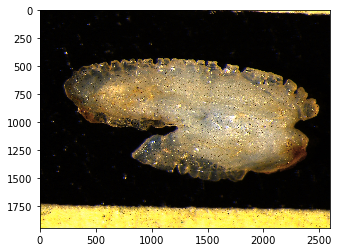

'DouglasReef'

In [8]:
plt.imshow(x_aug[0])
plt.show()
y_aug[0]

In [9]:
print(len(x_train))

pk = 'x_train.dat'
with open(pk, "wb") as f:
    pickle.dump(x_train, f)

676


In [10]:
# info
df_info.head()

,OTO_ID#,SAMP_ID,DATE,AREA,LOCATION,LATITUDE,LONGITUDE,VESSEL,GEAR,SLIDE#,...,SZ_RANGE,TRAY,CELL#,#OTOS,COMMENTS,Remove,x,folder,picname,cal
0,1,1410TGKIM,2014-04-10,PWS,Kayak Is.,60.0104,144.2295,Gray Area,Gill net,9.0,...,Mixed,2,2-A1,2,NaN,NaN,NaN,NaN,NaN,1
1,2,1410TGKIM,2014-04-10,PWS,Kayak Is.,60.0104,144.2295,Gray Area,Gill net,9.0,...,Mixed,2,2-A2,2,NaN,NaN,NaN,NaN,NaN,1
2,3,1410TGKIM,2014-04-10,PWS,Kayak Is.,60.0104,144.2295,Gray Area,Gill net,9.0,...,Mixed,2,2-A3,2,NaN,NaN,NaN,NaN,NaN,1
3,4,1410TGKIM,2014-04-10,PWS,Kayak Is.,60.0104,144.2295,Gray Area,Gill net,9.0,...,Mixed,2,2-A4,2,NaN,NaN,NaN,NaN,NaN,1
4,5,1410TGKIM,2014-04-10,PWS,Kayak Is.,60.0104,144.2295,Gray Area,Gill net,9.0,...,Mixed,2,2-A5,2,NaN,NaN,NaN,NaN,NaN,1


In [11]:
# all distinct locations
locations = df_info['LOCATION'].unique()
print(locations)

['Kayak Is.' 'Landlocked Bay' 'Rocky Bay' 'Stockdale Harbor' 'Kukak Bay'
 'Uganik Bay' 'Douglas Reef' 'Iniskin Bay']


In [12]:
bins = [0,4,7,max(df_info['AGE'])]
df_info['AGE'].value_counts(bins = bins, sort= False)
# a good chunk of the fish are between 5-7 years old

(-0.001, 4.0]    153
(4.0, 7.0]       274
(7.0, 12.0]      293
Name: AGE, dtype: int64